# D212 Assessment 3

# 1. Import Data

#### Import relevant packages

In [1]:
# Pandas for operation of dataframes
import pandas as pd
import numpy as np

# Import the transaction encoder function from mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Import matplotlib and seaborn for data visualization
from matplotlib import pyplot as plt
import seaborn as sns

#### Read in dataframe

In [2]:
# Read in dataset as dataframe with pandas read_csv function
teleco_df = pd.read_csv('teleco_market_basket.csv')

In [3]:
# Visualize the head of the dataset with pandas head function
teleco_df.head()

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Preprocessing/ Transform Data

In [5]:
# Convert teleco dataframe to a list of lists
transactions = teleco_df.values.tolist()

# Iterate through loop 
transaction_list = []
for transaction in transactions:
    item_list = []
    for item in transaction:
        if str(item) != 'nan':
            item_list.append(item)
    if len(item_list) > 0:
        transaction_list.append(item_list)

In [6]:
# Instantiate transaction encoder and fit to transactions list of lists
encoder = TransactionEncoder().fit(transaction_list)

# # Encode transaction data using onehot method
onehot = encoder.transform(transaction_list)

# # Convert encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_)

In [7]:
# Save cleaned, converted dataframe for submission
onehot.to_csv('onehot_converted_teleco_data.csv', index=False)

In [8]:
# Preview head of converted, onehot encoded dataset
onehot.head()

,10ft iPHone Charger Cable,10ft iPHone Charger Cable 2 Pack,3 pack Nylon Braided Lightning Cable,3A USB Type C Cable 3 pack 6FT,5pack Nylon Braided USB C cables,ARRIS SURFboard SB8200 Cable Modem,Anker 2-in-1 USB Card Reader,Anker 4-port USB hub,Anker USB C to HDMI Adapter,Apple Lightning to Digital AV Adapter,...,hP 65 Tri-color ink,iFixit Pro Tech Toolkit,iPhone 11 case,iPhone 12 Charger cable,iPhone 12 Pro case,iPhone 12 case,iPhone Charger Cable Anker 6ft,iPhone SE case,nonda USB C to USB Adapter,seenda Wireless mouse
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### One example of a transaction in the dataset

In [9]:
# Use indexign with iloc to select first transaction
onehot.iloc[[0]]

,10ft iPHone Charger Cable,10ft iPHone Charger Cable 2 Pack,3 pack Nylon Braided Lightning Cable,3A USB Type C Cable 3 pack 6FT,5pack Nylon Braided USB C cables,ARRIS SURFboard SB8200 Cable Modem,Anker 2-in-1 USB Card Reader,Anker 4-port USB hub,Anker USB C to HDMI Adapter,Apple Lightning to Digital AV Adapter,...,hP 65 Tri-color ink,iFixit Pro Tech Toolkit,iPhone 11 case,iPhone 12 Charger cable,iPhone 12 Pro case,iPhone 12 case,iPhone Charger Cable Anker 6ft,iPhone SE case,nonda USB C to USB Adapter,seenda Wireless mouse
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


#### Convert onehot to dataframe of rules using apriori and association_rules

In [10]:
# Use apriori from mlxtend to reduce complexity of dataset by elminating low support items (<= 0.006)
frequent_itemsets = apriori(onehot,
                           min_support = 0.006,
                           use_colnames = True)

# Use association rules to create a dataframe of rules with support, confidence, lift, leverage, and conviction values
# Use a threshold of 0 to keep pruning to 0
rules = association_rules(frequent_itemsets,
                 metric = 'support',
                 min_threshold = 0.0)

In [11]:
# Preview the rules
rules.sort_values('support', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
344,(Dust-Off Compressed Gas 2 pack),(VIVO Dual LCD Monitor Desk mount),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
345,(VIVO Dual LCD Monitor Desk mount),(Dust-Off Compressed Gas 2 pack),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
287,(Dust-Off Compressed Gas 2 pack),(HP 61 ink),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
286,(HP 61 ink),(Dust-Off Compressed Gas 2 pack),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
134,(Apple Pencil),(Dust-Off Compressed Gas 2 pack),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815


# 3. Data Exploration of Rules

In [12]:
# Show statistical summary information from rules dataframe
rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000
mean,0.100688,0.100688,0.010696,0.161561,1.675712,0.003521,1.086012
std,0.067717,0.067717,0.006661,0.115416,0.515924,0.002815,0.111190
min,0.011332,0.011332,0.006133,0.025727,0.389603,-0.011697,0.839605
25%,0.043061,0.043061,0.006832,0.068173,1.325752,0.002136,1.019385
50%,0.081056,0.081056,0.008266,0.126949,1.612910,0.003307,1.045885
75%,0.163845,0.163845,0.011465,0.233010,1.955857,0.004600,1.107902
max,0.238368,0.238368,0.059725,0.576471,4.122410,0.022088,1.798297


#### Pairplot

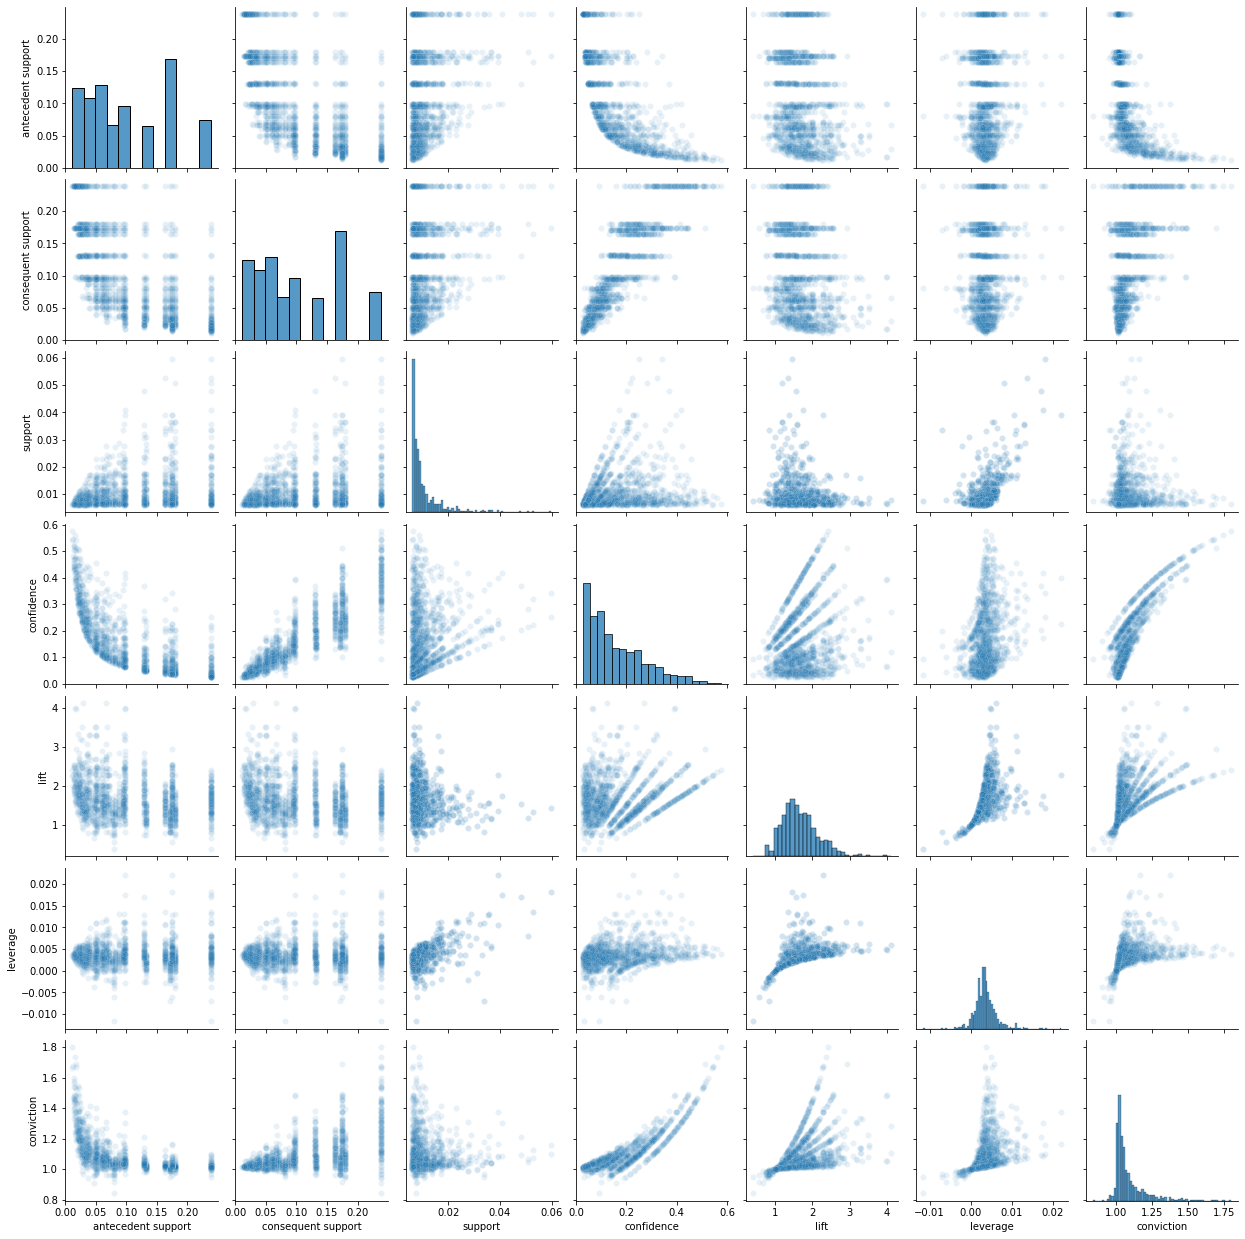

In [13]:
# Create pairplot with alpha set to 0.1
sns.pairplot(rules, plot_kws=dict(alpha=0.1))
plt.show()

# 4. Pruning - top 3 rules

#### Graph of confidence and support indicate appropriate thresholds of 0.36 for confidence and 0.038 for support 

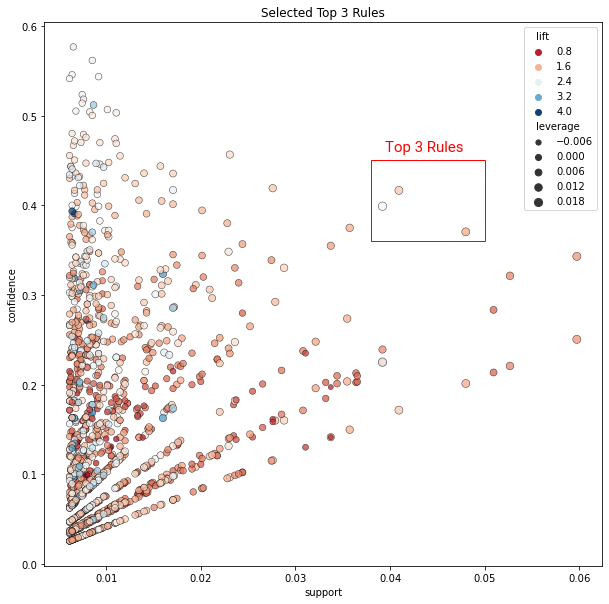

In [14]:
# Create figure and axis
fig, ax = plt.subplots(figsize=[10,10])

# Create scatterplot using support on the x-axis, confidence on the y-axis, leverage for color, and lift for size
sns.scatterplot(x='support', y='confidence', hue='lift', palette='RdBu', data=rules, 
                size='leverage', edgecolor='black', alpha=0.75)

# Coordinates to draw a box around selected rules, min x values indicate support threshold, 
# min y values indicate confidence threshold
points = [[0.050, 0.45], 
          [0.050, 0.36],
          [0.038, 0.36],
          [0.038, 0.45]]

# Plot coordinates of points as 4 lines into selection box
line = plt.Polygon(points, edgecolor='r', fill=None)
plt.gca().add_line(line)

# Provide annotation to the selection box
font_dict={'family': 'roboto', 'color': 'r', 'size': 15}
ax.text(0.0395, 0.46,'Top 3 Rules',  fontdict=font_dict)

# Title plot
plt.title('Selected Top 3 Rules')

plt.show()

In [15]:
# Count original rules after apriori
print('There are {} rules before pruning.'.format(len(rules)))

There are 1294 rules before pruning.


In [16]:
# Prune to select top 3 rules from visualization above
rules_top3 = rules[(rules['support'] >= 0.038) & (rules['confidence'] >= 0.36)]

# Verify that the top 3 rules have been selected
print('There are {} rules after pruning.'.format(len(rules_top3)))

There are 3 rules after pruning.


In [17]:
# Print top 3 rules by support in descending order
rules_top3.sort_values('support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
328,(Screen Mom Screen Cleaner kit),(Dust-Off Compressed Gas 2 pack),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650
326,(SanDisk Ultra 64GB card),(Dust-Off Compressed Gas 2 pack),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
630,(SanDisk Ultra 64GB card),(VIVO Dual LCD Monitor Desk mount),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997


In [18]:
# Create list of the names 
scores = ['support', 'confidence', 'lift', 'leverage', 'conviction']

# Iterate through loop to calculate association scores for top 3 rules
for score in scores:
    print('The top 3 rules fall into the top {:.2f}% percentile of {} scores.'.format((100-len(rules[rules[score] > min(rules_top3[score])])/len(rules)*100), score))

The top 3 rules fall into the top 99.23% percentile of support scores.
The top 3 rules fall into the top 93.28% percentile of confidence scores.
The top 3 rules fall into the top 46.21% percentile of lift scores.
The top 3 rules fall into the top 99.54% percentile of leverage scores.
The top 3 rules fall into the top 88.95% percentile of conviction scores.


In [19]:
# Show statistical summary information from top 3 rules dataframe
rules_top3.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.108697,0.216949,0.042705,0.395279,1.864153,0.018900,1.296350
std,0.018088,0.037099,0.004661,0.023305,0.382279,0.002768,0.082547
min,0.098254,0.174110,0.039195,0.370370,1.553774,0.017105,1.209650
25%,0.098254,0.206239,0.040061,0.384642,1.650648,0.017306,1.257526
50%,0.098254,0.238368,0.040928,0.398915,1.747522,0.017507,1.305401
75%,0.113918,0.238368,0.044461,0.407734,2.019342,0.019798,1.339699
max,0.129583,0.238368,0.047994,0.416554,2.291162,0.022088,1.373997


# 5. Additional Resources

https://towardsdatascience.com/market-basket-analysis-101-key-concepts-1ddc6876cd00

https://towardsdatascience.com/a-gentle-introduction-on-market-basket-analysis-association-rules-fa4b986a40ce

https://pbpython.com/market-basket-analysis.html